# Task A & B EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json, math
from tqdm import tqdm


sns.set_theme(style="whitegrid")

### Importing Data

In [2]:
df = pd.read_json(
    "data/chatbot-arena-conversations.jsonl.gz",
    lines=True,
)
scores_df = pd.read_json(
    "data/chatbot-arena-gpt3-scores.jsonl.gz",
    lines=True,
)
df = df.merge(scores_df, on='question_id')
df.head() 

,question_id,model_a,model_b,winner,judge,conversation_a,conversation_b,prompt_x,prompt_length,prompt_y,openai_scores_raw_choices_nested,topic_modeling_1,score_reason_1,score_value_1,topic_modeling_2,score_reason_2,score_value_2,topic_modeling_3,score_reason_3,score_value_3
0,58210e39b3fd4441a2bd4a518bb44c2d,chatglm-6b,koala-13b,model_b,arena_user_973,[{'content': 'What is the difference between O...,[{'content': 'What is the difference between O...,What is the difference between OpenCL and CUDA?,47,What is the difference between OpenCL and CUDA?,"[{'finish_reason': 'stop', 'index': 0, 'logpro...",Technical Comparison,This prompt requires the AI to accurately comp...,9,Software Comparison,This prompt assesses the AI's factual accuracy...,8,"Comparison, Technology",This prompt requires the AI to demonstrate kno...,9
1,2564acd09e3942fd97657d05282d4389,oasst-pythia-12b,alpaca-13b,tie,arena_user_973,[{'content': 'Why did my parent not invite me ...,[{'content': 'Why did my parent not invite me ...,Why did my parent not invite me to their wedding?,49,Why did my parent not invite me to their wedding?,"[{'finish_reason': 'stop', 'index': 0, 'logpro...","Reasoning, Emotion",This prompt requires the AI to understand huma...,9,"Emotions, Relationships",This prompt involves understanding complex hum...,8,"Reasoning, Emotional",This prompt challenges the AI to infer motives...,8
2,90bfd142157948aba01931726c888e7f,koala-13b,oasst-pythia-12b,model_b,arena_user_973,"[{'content': 'Fuji vs. Nikon, which is better?...","[{'content': 'Fuji vs. Nikon, which is better?...","Fuji vs. Nikon, which is better?",32,"Fuji vs. Nikon, which is better?","[{'finish_reason': 'stop', 'index': 0, 'logpro...",Camera comparison,This prompt does not require problem-solving s...,2,Comparative Analysis,This prompt assesses the AI's ability to analy...,6,Photography comparison,This prompt is subjective and does not provide...,2
3,a7c5accc53e649a3bc6b2e41d962ebc4,vicuna-13b,oasst-pythia-12b,model_b,arena_user_973,[{'content': 'How to build an arena for chatbo...,[{'content': 'How to build an arena for chatbo...,How to build an arena for chatbots?,35,How to build an arena for chatbots?,"[{'finish_reason': 'stop', 'index': 0, 'logpro...",Chatbot Arena,This prompt requires problem-solving skills an...,8,Chatbot Arena,This prompt requires the AI to engage in probl...,8,Chatbot Arena,This prompt requires problem-solving skills an...,8
4,adf27e819a3c494cb6e993f0c660e097,vicuna-13b,koala-13b,model_a,arena_user_973,"[{'content': 'When is it today?', 'role': 'use...","[{'content': 'When is it today?', 'role': 'use...",When is it today?,17,When is it today?,"[{'finish_reason': 'stop', 'index': 0, 'logpro...",Time Query,This prompt is very straightforward and does n...,2,Date Inquiry,This prompt is very straightforward and does n...,2,Time-based Inquiry,This prompt is too straightforward and simply ...,2


In [3]:
#Looking at Datatypes
data_types = df.dtypes
data_types

question_id                         object
model_a                             object
model_b                             object
winner                              object
judge                               object
conversation_a                      object
conversation_b                      object
prompt_x                            object
prompt_length                        int64
prompt_y                            object
openai_scores_raw_choices_nested    object
topic_modeling_1                    object
score_reason_1                      object
score_value_1                       object
topic_modeling_2                    object
score_reason_2                      object
score_value_2                       object
topic_modeling_3                    object
score_reason_3                      object
score_value_3                       object
dtype: object

### Looking for NaN values

In [4]:
#Finding Na values
na_columns = df.isna().any()

print(na_columns)
nan_values_per_column = df.isna().sum()

print("Number of NaN values per column:")
print(nan_values_per_column)

question_id                         False
model_a                             False
model_b                             False
winner                              False
judge                               False
conversation_a                      False
conversation_b                      False
prompt_x                            False
prompt_length                       False
prompt_y                            False
openai_scores_raw_choices_nested    False
topic_modeling_1                     True
score_reason_1                       True
score_value_1                        True
topic_modeling_2                     True
score_reason_2                       True
score_value_2                        True
topic_modeling_3                     True
score_reason_3                       True
score_value_3                        True
dtype: bool
Number of NaN values per column:
question_id                          0
model_a                              0
model_b                              

In [5]:
#Finding nan rows
rows_with_nan = df[df.isna().any(axis=1)]

rows_with_nan.head()

,question_id,model_a,model_b,winner,judge,conversation_a,conversation_b,prompt_x,prompt_length,prompt_y,openai_scores_raw_choices_nested,topic_modeling_1,score_reason_1,score_value_1,topic_modeling_2,score_reason_2,score_value_2,topic_modeling_3,score_reason_3,score_value_3
584,e6d45ead33114cca8ee3cfa028517eff,vicuna-13b,oasst-pythia-12b,model_b,arena_user_1752,[{'content': 'I want you to act as a linux ter...,[{'content': 'I want you to act as a linux ter...,I want you to act as a linux terminal. I will ...,426,I want you to act as a linux terminal. I will ...,"[{'finish_reason': 'stop', 'index': 0, 'logpro...",None,None,None,None,None,None,None,None,None
5076,addaa796ee094f029f8014ea1468df8a,alpaca-13b,claude-v1,model_b,arena_user_6068,[{'content': ' Assume the role of an API that ...,[{'content': ' Assume the role of an API that ...,\nAssume the role of an API that provides a ch...,1049,\nAssume the role of an API that provides a ch...,"[{'finish_reason': 'stop', 'index': 0, 'logpro...",None,None,None,None,None,None,None,None,None
5476,d37eb99864fa41ecab49026abdddb53e,koala-13b,chatglm-6b,tie,arena_user_7137,[{'content': 'I want you to act as a javascrip...,[{'content': 'I want you to act as a javascrip...,I want you to act as a javascript console. I w...,464,I want you to act as a javascript console. I w...,"[{'finish_reason': 'stop', 'index': 0, 'logpro...",None,None,None,None,None,None,None,None,None
5613,6da02001e74041d0947982fb4d05db9e,gpt-4,RWKV-4-Raven-14B,tie,arena_user_7137,[{'content': 'I want you to act as a linux ter...,[{'content': 'I want you to act as a linux ter...,I want you to act as a linux terminal. I will ...,426,I want you to act as a linux terminal. I will ...,"[{'finish_reason': 'stop', 'index': 0, 'logpro...",None,None,None,None,None,None,None,None,None
6280,d93e36df73e84aa2ade15d4a038c098f,chatglm-6b,vicuna-13b,model_b,arena_user_6406,[{'content': '# User Input ## This is what the...,[{'content': '# User Input ## This is what the...,# User Input\n## This is what the user request...,1536,# User Input\n## This is what the user request...,"[{'finish_reason': 'stop', 'index': 0, 'logpro...",None,None,None,None,None,None,None,None,None


## **Ranking the Models**

In [6]:
# Computing win rates
wins = (
    df[df['winner'] == 'model_a'].groupby('model_a').size() + 
    df[df['winner'] == 'model_b'].groupby('model_b').size()
).rename_axis('model')

questions = (
    df.groupby('model_a').size() + 
    df.groupby('model_b').size()
).rename_axis('model')

win_rate = (
    wins / questions
).rename('win rate')

win_rate.sort_values(ascending=False)

model
gpt-4                      0.676095
claude-v1                  0.606818
claude-instant-v1          0.557377
gpt-3.5-turbo              0.533241
vicuna-13b                 0.438651
guanaco-33b                0.425560
palm-2                     0.416264
wizardlm-13b               0.367612
koala-13b                  0.350423
vicuna-7b                  0.303862
alpaca-13b                 0.244789
oasst-pythia-12b           0.241088
mpt-7b-chat                0.238642
gpt4all-13b-snoozy         0.235762
RWKV-4-Raven-14B           0.233997
chatglm-6b                 0.197990
fastchat-t5-3b             0.197337
stablelm-tuned-alpha-7b    0.178802
dolly-v2-12b               0.156816
llama-13b                  0.144678
Name: win rate, dtype: float64

In [7]:
wins.describe()

count      20.000000
mean      894.800000
std       653.561707
min       178.000000
25%       373.250000
50%       655.500000
75%      1214.000000
max      2223.000000
dtype: float64

## Distribution of the prompt and response length

In [8]:
df.iloc[0]['conversation_a']

[{'content': 'What is the difference between OpenCL and CUDA?',
  'role': 'user'},
 {'content': 'OpenCL and CUDA are two different programming models that are used for parallel computing.OpenCL is a general-purpose并行编程接口 that allows developers to write parallel code that can run on any platform that supportsCL, which includes most modern operating systems and computer systems, including Windows, Linux, and macOS. It provides a lower-level, more flexible API that is more suitable for building large-scale distributed computing systems.CUDA is a specific implementation ofOpenCL that is designed for performance and scalability in devices with multiple GPU(s). It was developed by Nvidia and is widely used for scientific computing, machine learning, and图形图像处理. The CUDA API provides a high-level, more efficient way to write parallel code that can run on top of a GPU, while still maintaining the ability to write code that can be easily adapted for other parallel computing platforms.',
  'role'

In [9]:
#looking at distribution of propmt lengths
df['prompt'] = df['conversation_a'].str[0].str['content']
df['prompt_length'] = df['prompt'].str.len()
df['prompt_length'].describe()

count    25336.000000
mean       197.089083
std        369.765075
min         16.000000
25%         42.000000
50%         72.000000
75%        156.000000
max       2560.000000
Name: prompt_length, dtype: float64

#### **Fig 1: Prompt Lengths**

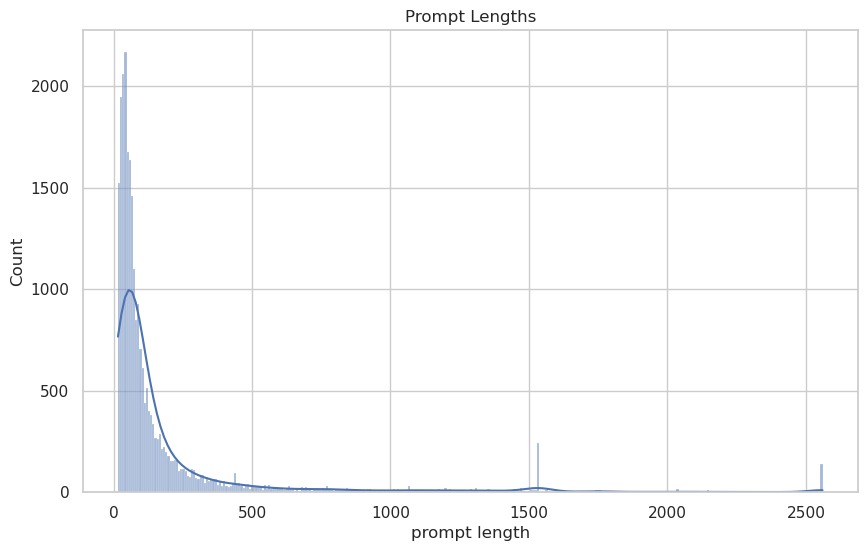

In [10]:
# plot the distribution of the length of the prompt
plt.figure(figsize=(10, 6))
sns.histplot(df["prompt_length"], kde=True)
plt.xlabel('prompt length')
plt.title('Prompt Lengths')
plt.show()

In [11]:
#Calculating response lengths
df['response_a'] = df['conversation_a'].str[1].str['content']
df['response_a_length'] = df['response_a'].str.len()
df['response_b'] = df['conversation_b'].str[1].str['content']
df['response_b_length'] = df['response_b'].str.len()
response_lengths = pd.concat([df['response_a_length'], df['response_b_length']])
response_lengths.describe()

count    50672.000000
mean       772.349700
std        657.414181
min          0.000000
25%        231.000000
50%        586.000000
75%       1215.000000
max       9857.000000
dtype: float64

#### **Fig 2: Response Lengths**

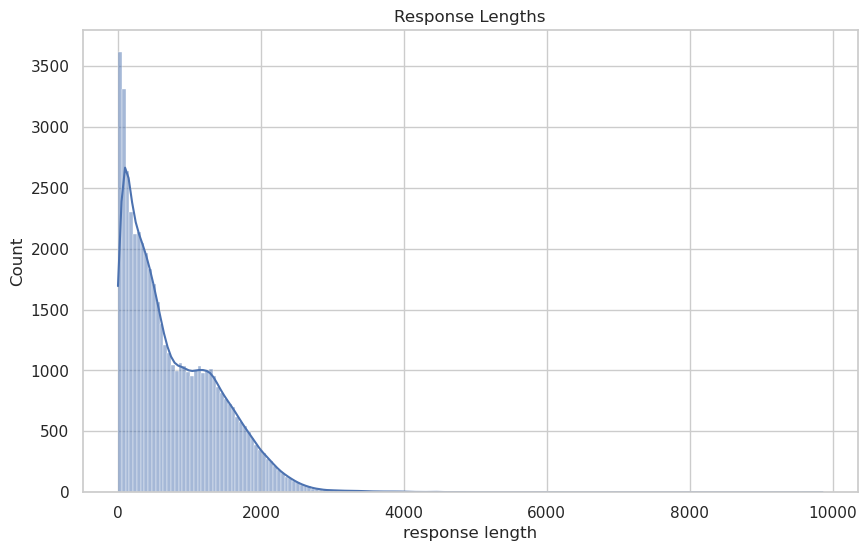

In [12]:
# plot the distribution of the length of the response
plt.figure(figsize=(10, 6))
sns.histplot(response_lengths, kde=True)
plt.xlabel('response length')
plt.title('Response Lengths')
plt.show()

In [13]:
# Do certain models tend to produce longer responses?
# Compute: average length of response per model
model_response_lengths = (
    (df.groupby('model_a')['response_a_length'].sum() + 
     df.groupby('model_b')['response_b_length'].sum()) / 
    (df.groupby('model_a').size() + 
     df.groupby('model_b').size())
).rename_axis('model')

model_response_lengths.sort_values()

model
alpaca-13b                  320.576236
llama-13b                   397.634162
dolly-v2-12b                410.450429
mpt-7b-chat                 584.000918
gpt4all-13b-snoozy          621.023841
oasst-pythia-12b            674.029311
gpt-3.5-turbo               679.457341
RWKV-4-Raven-14B            746.507468
fastchat-t5-3b              755.238499
stablelm-tuned-alpha-7b     801.917051
wizardlm-13b                814.260047
vicuna-7b                   843.079572
vicuna-13b                  846.660306
chatglm-6b                  854.616301
koala-13b                   919.001646
claude-instant-v1           969.645306
gpt-4                       988.150547
guanaco-33b                 997.172596
palm-2                     1013.244396
claude-v1                  1082.456494
dtype: float64

#### **Fig 3: Average Response Length**

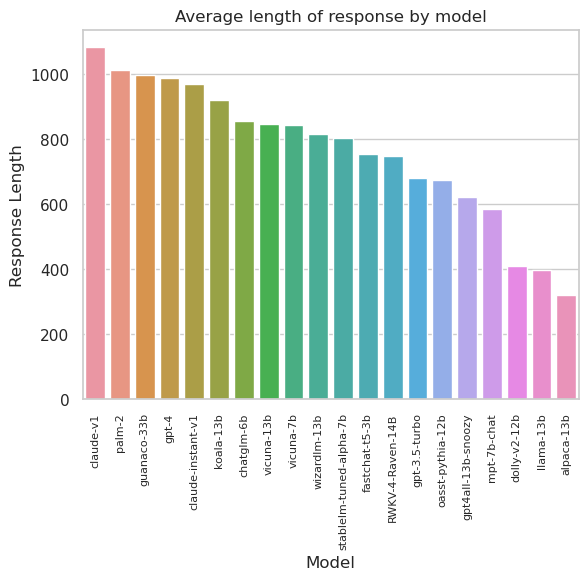

In [14]:
#plotting average response lengths by model
model_response_lengths_sorted = model_response_lengths.sort_values(ascending = False)

sns.barplot(x=model_response_lengths_sorted.index, y=model_response_lengths_sorted.values)

plt.xticks(rotation=90, fontsize=8)

plt.title('Average length of response by model')
plt.ylabel('Response Length')
plt.xlabel('Model')

plt.show()

In [15]:
# Do judges tend to prefer longer responses?
# Compute: average length of winning response, average length of losing response
winning_response_lengths = pd.concat([
    df[df['winner'] == 'model_a']['response_a_length'],
    df[df['winner'] == 'model_b']['response_b_length']
])

losing_response_lengths = pd.concat([
    df[df['winner'] == 'model_a']['response_b_length'],
    df[df['winner'] == 'model_b']['response_a_length']
])

In [16]:
display(winning_response_lengths.describe())
display(losing_response_lengths.describe())

count    17896.000000
mean       929.591976
std        706.031468
min          1.000000
25%        333.000000
50%        823.000000
75%       1412.000000
max       7135.000000
dtype: float64

count    17896.000000
mean       704.980834
std        609.627289
min          0.000000
25%        224.000000
50%        525.000000
75%       1089.000000
max       9857.000000
dtype: float64

#### **Fig 4: Boxplot Response Length Distribution by Win or Loss**

Text(0, 0.5, 'Response Length')

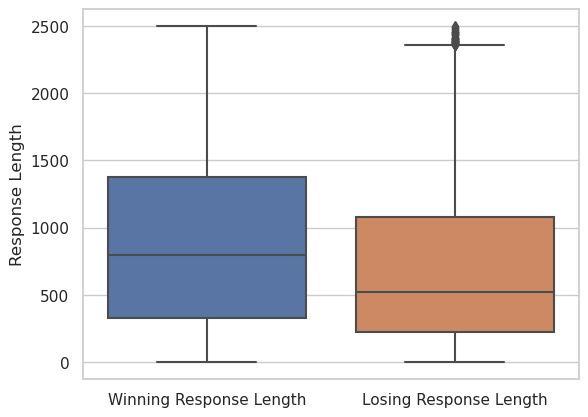

In [17]:
# plots: side-by-side boxplot with outliers removed
response_df = pd.DataFrame({
    'Winning Response Length': winning_response_lengths[winning_response_lengths < 2500],
    'Losing Response Length': losing_response_lengths[losing_response_lengths < 2500]
})

sns.boxplot(data=response_df)
plt.ylabel('Response Length')


#### **Fig 5: Histogram Response Length Distribution by Win or Loss**


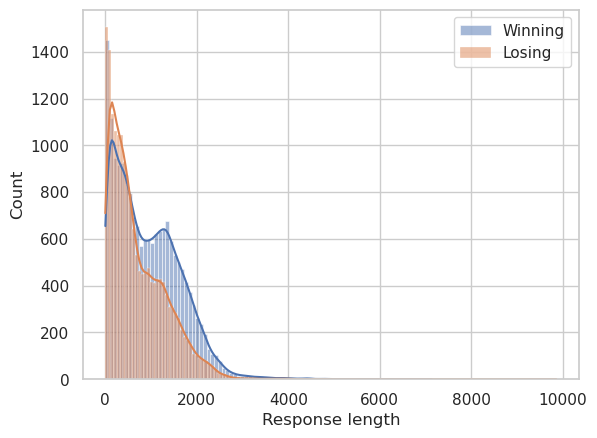

In [18]:
#plotting response lengths
sns.histplot(winning_response_lengths, label='Winning', kde=True, alpha=0.5)
sns.histplot(losing_response_lengths, label='Losing', kde=True, alpha=0.5)
plt.xlabel('Response length')
plt.legend()
plt.show()

## **Hardness score distribution and its correlation with the models**

In [19]:
# cleaning the data
df['score_value_1'] = df['score_value_1'].apply(lambda x: x[0][0] if isinstance(x, list) else x)
df['score_value_2'] = df['score_value_2'].apply(lambda x: x[0][0] if isinstance(x, list) else x)
df['score_value_3'] = df['score_value_3'].apply(lambda x: x[0][0] if isinstance(x, list) else x)
df['score_avg'] = (df['score_value_1'] + df['score_value_2'] + df['score_value_3'] ) / 3

#### **Fig 6: Hardness Score Distribution**


Text(0, 0.5, 'Hardness Score')

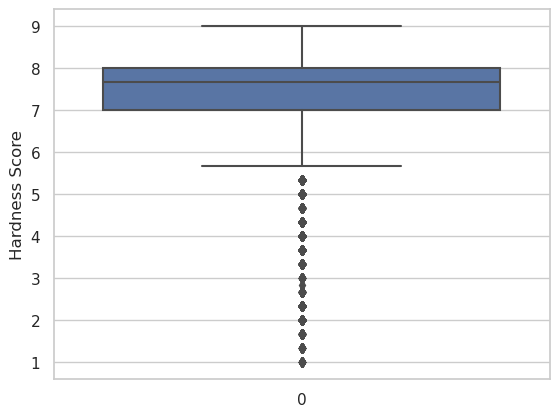

In [20]:
sns.boxplot(df['score_avg'])
plt.ylabel('Hardness Score')

In [21]:
df['score_avg'].value_counts()

score_avg
8.000000    5273
7.666667    3556
7.333333    2889
8.333333    2684
7.000000    2643
8.666667    1654
9.000000    1133
2.000000    1096
6.666667     813
5.333333     561
5.666667     505
3.666667     380
6.000000     374
6.333333     300
4.000000     261
5.000000     231
2.333333     203
4.333333     189
3.333333     151
4.666667     117
1.666667     100
2.666667      93
1.333333      39
3.000000      38
1.000000      25
2.833333       1
Name: count, dtype: int64

In [22]:
df['score_avg'].describe()

count    25309.000000
mean         7.119384
std          1.715284
min          1.000000
25%          7.000000
50%          7.666667
75%          8.000000
max          9.000000
Name: score_avg, dtype: float64

In [23]:
# win rates on hard questions
hard = df[df['score_avg'] == 9.0]

hard_wins = (
    hard[hard['winner'] == 'model_a'].groupby('model_a').size() + 
    hard[hard['winner'] == 'model_b'].groupby('model_b').size()
).rename_axis('model')

hard_questions = (
    hard.groupby('model_a').size() + 
    hard.groupby('model_b').size()
).rename_axis('model')

hard_win_rate = (
    hard_wins / hard_questions
).rename('hard win rate')

hard_win_rate.sort_values(ascending=False)


model
gpt-4                      0.769784
claude-instant-v1          0.692308
claude-v1                  0.551181
gpt-3.5-turbo              0.526627
vicuna-13b                 0.512315
guanaco-33b                0.400000
palm-2                     0.396396
koala-13b                  0.370370
vicuna-7b                  0.354839
oasst-pythia-12b           0.275000
mpt-7b-chat                0.274725
wizardlm-13b               0.269231
stablelm-tuned-alpha-7b    0.250000
RWKV-4-Raven-14B           0.239130
chatglm-6b                 0.238532
alpaca-13b                 0.228571
fastchat-t5-3b             0.192308
gpt4all-13b-snoozy         0.147059
dolly-v2-12b               0.134831
llama-13b                  0.106667
Name: hard win rate, dtype: float64

In [24]:
#creating dataframe with win rate and hard win rate
hard_vs_reg_win = pd.DataFrame({
    'Win Rate': win_rate,
    'Hard Win Rate': hard_win_rate
}).sort_values('Win Rate', ascending=False)

In [25]:
#calculating correlation
correlation = hard_vs_reg_win['Win Rate'].corr(hard_vs_reg_win['Hard Win Rate'])
correlation

0.9490213069938123

#### **Fig 7: Correlation of Hard Win Rate vs Win Rate**


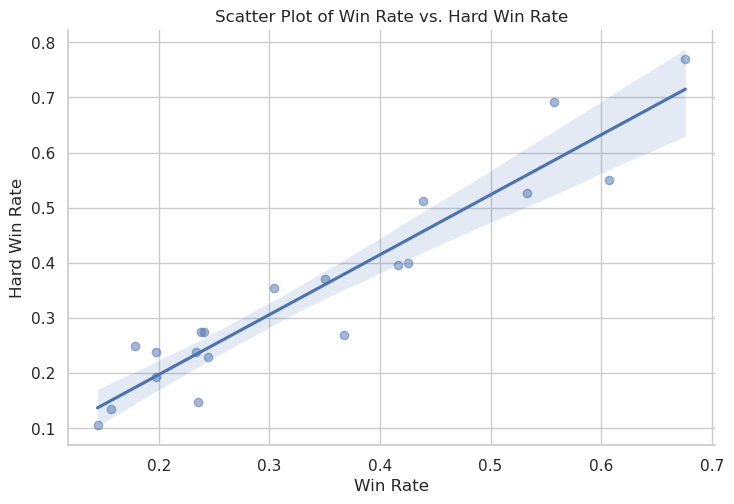

In [26]:
#plotting correlation
sns.lmplot(x='Win Rate', y='Hard Win Rate', data=hard_vs_reg_win, aspect=1.5, scatter_kws={'alpha':0.5})

plt.title(f'Scatter Plot of Win Rate vs. Hard Win Rate')

plt.show()

In [27]:
# creating elo ratings

def preety_print_model_ratings(ratings):
    df = pd.DataFrame([
        [n, ratings[n]] for n in ratings.keys()
    ], columns=["Model", "Elo rating"]).sort_values("Elo rating", ascending=False).reset_index(drop=True)
    df["Elo rating"] = (df["Elo rating"] + 0.5).astype(int)
    df.index = df.index + 1
    return df


def compute_mle_elo(df, SCALE=400, BASE=10, INIT_RATING=1000):
    from sklearn.linear_model import LogisticRegression
    models = pd.concat([df["model_a"], df["model_b"]]).unique()
    models = pd.Series(np.arange(len(models)), index=models)

    # duplicate battles
    df = pd.concat([df, df], ignore_index=True)
    p = len(models.index)
    n = df.shape[0]

    X = np.zeros([n, p])
    X[np.arange(n), models[df["model_a"]]] = +math.log(BASE)
    X[np.arange(n), models[df["model_b"]]] = -math.log(BASE)

    # one A win => two A win
    Y = np.zeros(n)
    Y[df["winner"] == "model_a"] = 1.0

    # one tie => one A win + one B win
    # find tie + tie (both bad) index
    tie_idx = (df["winner"] == "tie") | (df["winner"] == "tie (bothbad)")
    tie_idx[len(tie_idx)//2:] = False
    Y[tie_idx] = 1.0

    lr = LogisticRegression(fit_intercept=False)
    lr.fit(X,Y)

    elo_scores = SCALE * lr.coef_[0] + INIT_RATING

    # set anchor as llama-2-70b-chat = 1082
    if "llama-2-70b-chat" in models.index:
        elo_scores += 1082 - elo_scores[models["llama-2-70b-chat"]]
    return pd.Series(elo_scores, index = models.index).sort_values(ascending=False)

In [28]:
battles = df

In [29]:
#showing elo ratings per model
elo_mle_ratings = compute_mle_elo(battles)
preety_print_model_ratings(elo_mle_ratings)

,Model,Elo rating
1,gpt-4,1233
2,claude-v1,1187
3,claude-instant-v1,1165
4,gpt-3.5-turbo,1128
5,guanaco-33b,1085
6,palm-2,1075
7,vicuna-13b,1054
8,wizardlm-13b,1047
9,vicuna-7b,1018
10,koala-13b,1006


In [30]:
#elo distribution
elo_mle_ratings.describe()

count      20.000000
mean     1000.000000
std       119.751911
min       811.431578
25%       914.443178
50%       981.197200
75%      1077.190691
max      1233.403124
dtype: float64

## **Vizualizing the Variance**

#### **Fig 8: Elo Rating Distributions**


bootstrap: 100%|██████████| 100/100 [00:26<00:00,  3.78it/s]


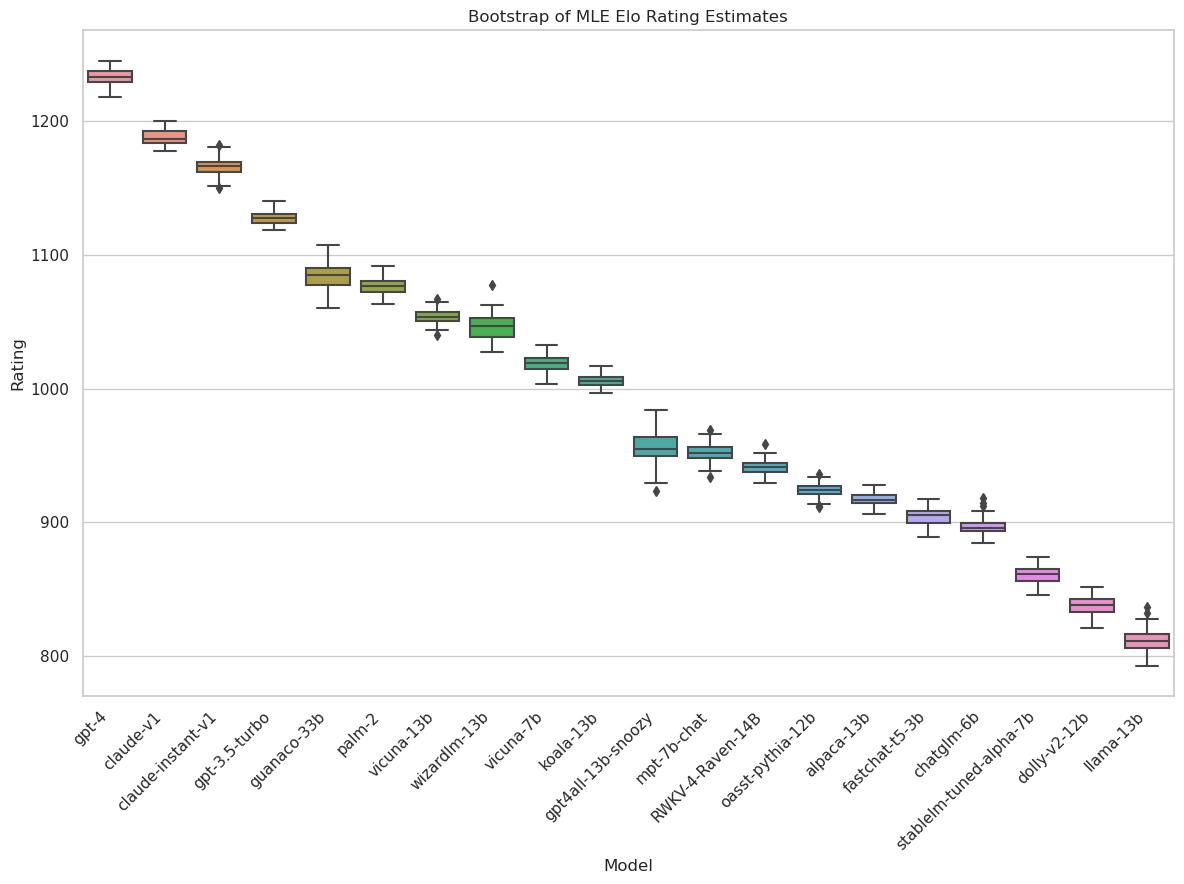

In [31]:
def get_bootstrap_result(battles, func_compute_elo, num_round):
    """
    Performs bootstrap on a dataset to estimate the uncertainty in Elo ratings.
    
    Args:
    battles (pd.DataFrame): dataset containing information battles.
    func_compute_elo (function): computes Elo ratings from a sample of battles.
    num_round (int): The number of bootstrap samples to generate.
    
    Returns:
    pd.DataFrame: A DataFrame containing the Elo ratings calculated from each bootstrap sample.
    """
    rows = []
    for i in tqdm(range(num_round), desc="bootstrap"):
        sampled_battles = battles.sample(frac=1.0, replace=True)
        rows.append(func_compute_elo(sampled_battles))
    df = pd.DataFrame(rows)
    return df[df.median().sort_values(ascending=False).index]

BOOTSTRAP_ROUNDS = 100
np.random.seed(42)
bootstrap_elo_lu = get_bootstrap_result(battles, compute_mle_elo, BOOTSTRAP_ROUNDS)

def visualize_bootstrap_scores(df, title):
    """
    Visualize the Elo ratings obtained from bootstrap samples using a box plot.
    
    Args:
    df (pd.DataFrame): The DataFrame containing the Elo ratings from bootstrap samples.
    title (str): The title of the plot.
    """
    df_long = df.melt(var_name='Model', value_name='Rating')
    plt.figure(figsize=(12, 9))
    sns.boxplot(x='Model', y='Rating', data=df_long)
    plt.title(title)
    plt.xlabel('Model')
    plt.ylabel('Rating')
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# Visualizing the Elo ratings
fig = visualize_bootstrap_scores(bootstrap_elo_lu, "Bootstrap of MLE Elo Rating Estimates")

#### **Fig 9: Battle Outcome Counts**


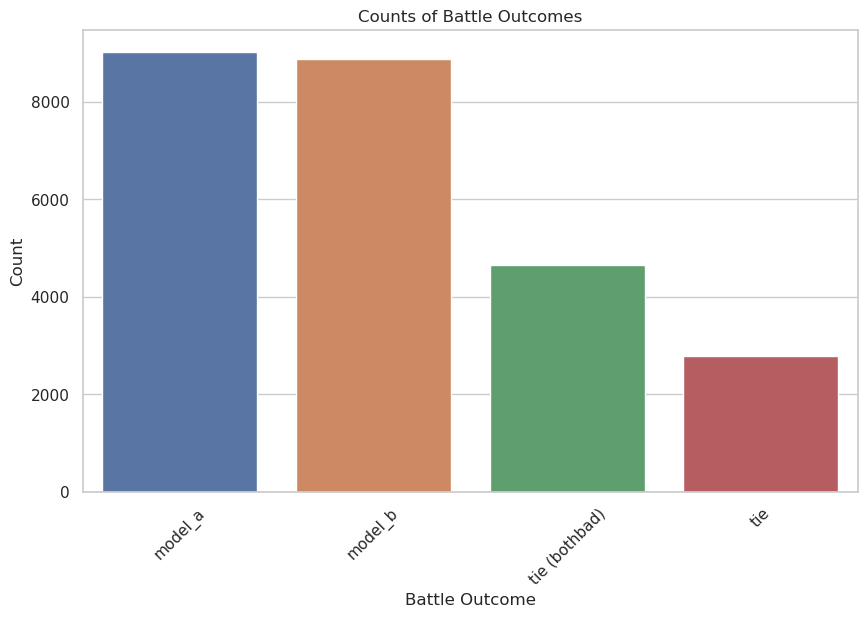

In [32]:
# Count the number of wins for each winner
winner_counts = df["winner"].value_counts().reset_index()
winner_counts.columns = ['Winner', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(data=winner_counts, x='Winner', y='Count')

plt.title('Counts of Battle Outcomes')
plt.xlabel('Battle Outcome')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [33]:
battles_no_ties = df[~df["winner"].str.contains("tie")]

#### **Fig 10: Battle Counts Per Model**


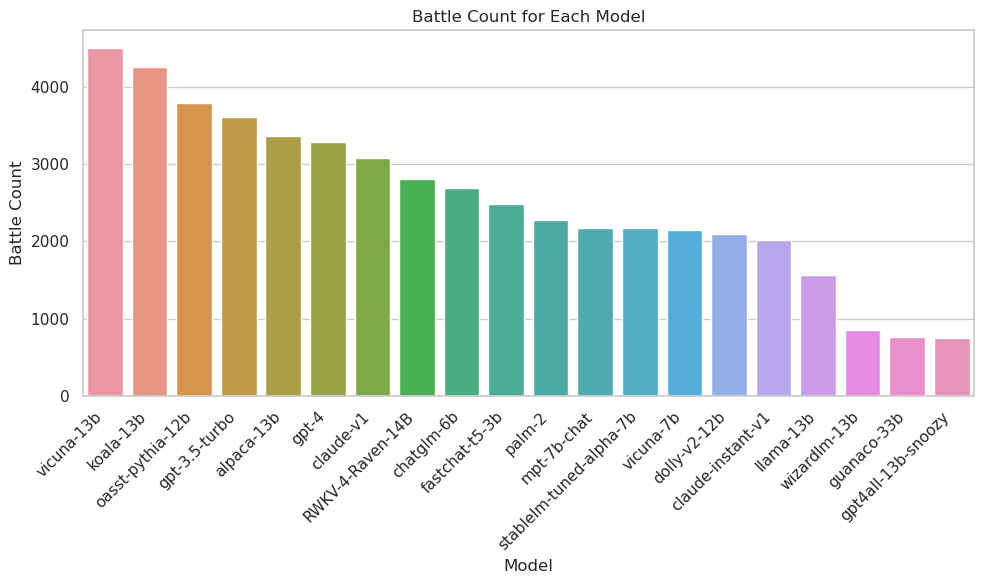

In [34]:
#plotting battle counts
model_counts = pd.concat([battles["model_a"], battles["model_b"]]).value_counts().reset_index()
model_counts.columns = ['Model', 'Battle Count']

plt.figure(figsize=(10, 6))
sns.barplot(data=model_counts, x='Model', y='Battle Count')

plt.title('Battle Count for Each Model')
plt.xlabel('Model')
plt.ylabel('Battle Count')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


#### **Fig 11: Battle Count of Each Combination of Models With Ties**


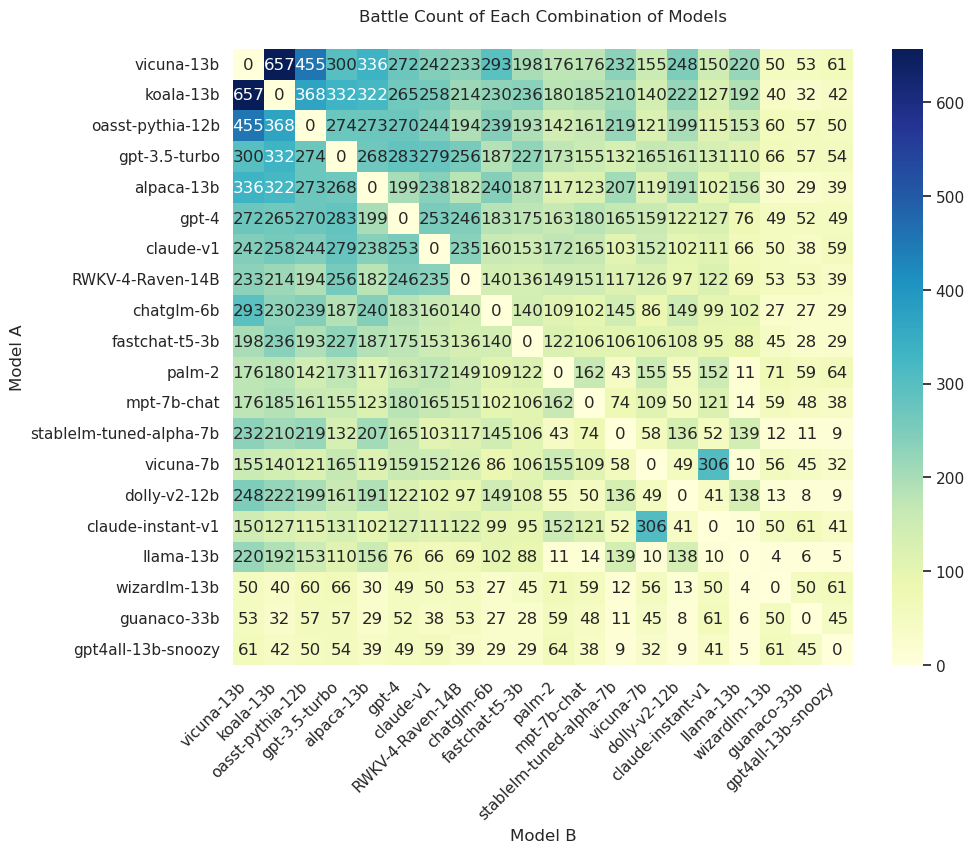

In [35]:
def visualize_battle_count(battles, title, show_num_models=30):
    # Create a pivot table from the battles DataFrame
    ptbl = pd.pivot_table(battles, index="model_a", columns="model_b", aggfunc="size", fill_value=0)
    # Compute the total battle counts
    battle_counts = ptbl + ptbl.T

    ordering = battle_counts.sum().sort_values(ascending=False).index[:show_num_models]

    battle_counts_filtered = battle_counts.loc[ordering, ordering]
    
    fig, ax = plt.subplots(figsize=(10, 8))

    sns.heatmap(battle_counts_filtered, annot=True, fmt="d", cmap="YlGnBu", ax=ax, cbar=True)

    ax.set_title(title, pad=20)
    ax.set_xlabel("Model B")
    ax.set_ylabel("Model A")
    plt.xticks(rotation=45, ha="right")
    plt.yticks(rotation=0)
    
    return fig


fig = visualize_battle_count(battles, title="Battle Count of Each Combination of Models", show_num_models=30)
plt.show(fig)

#### **Fig 12: Battle Count of Each Combination of Models With Ties**


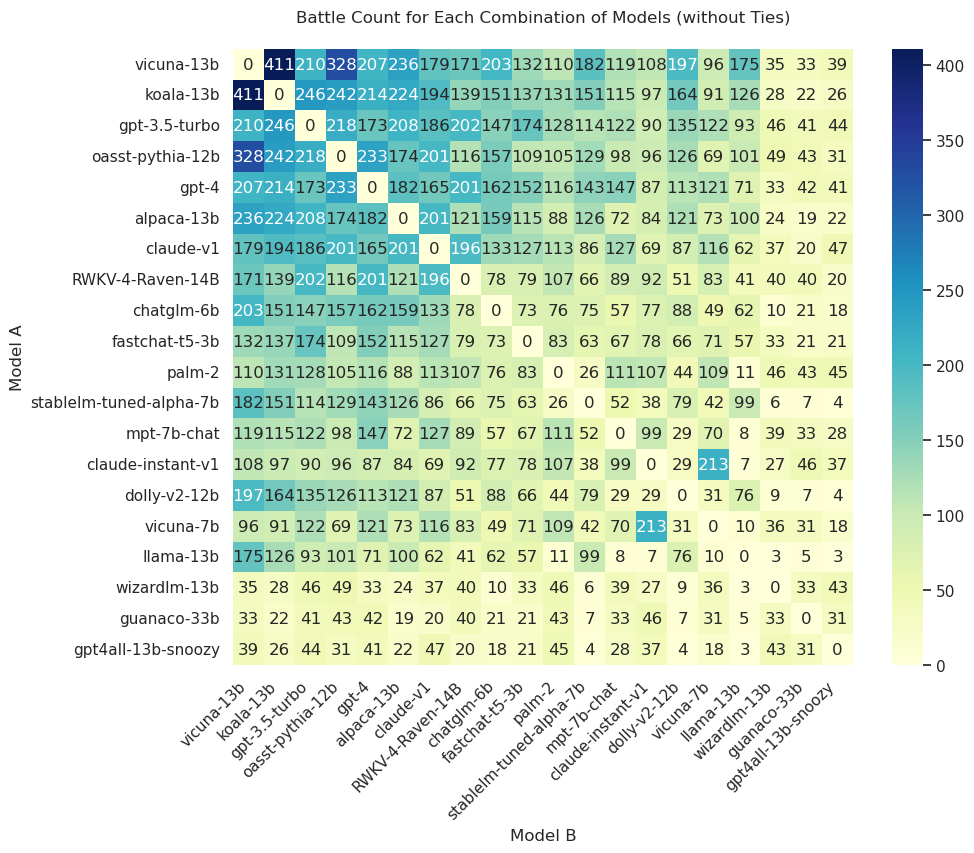

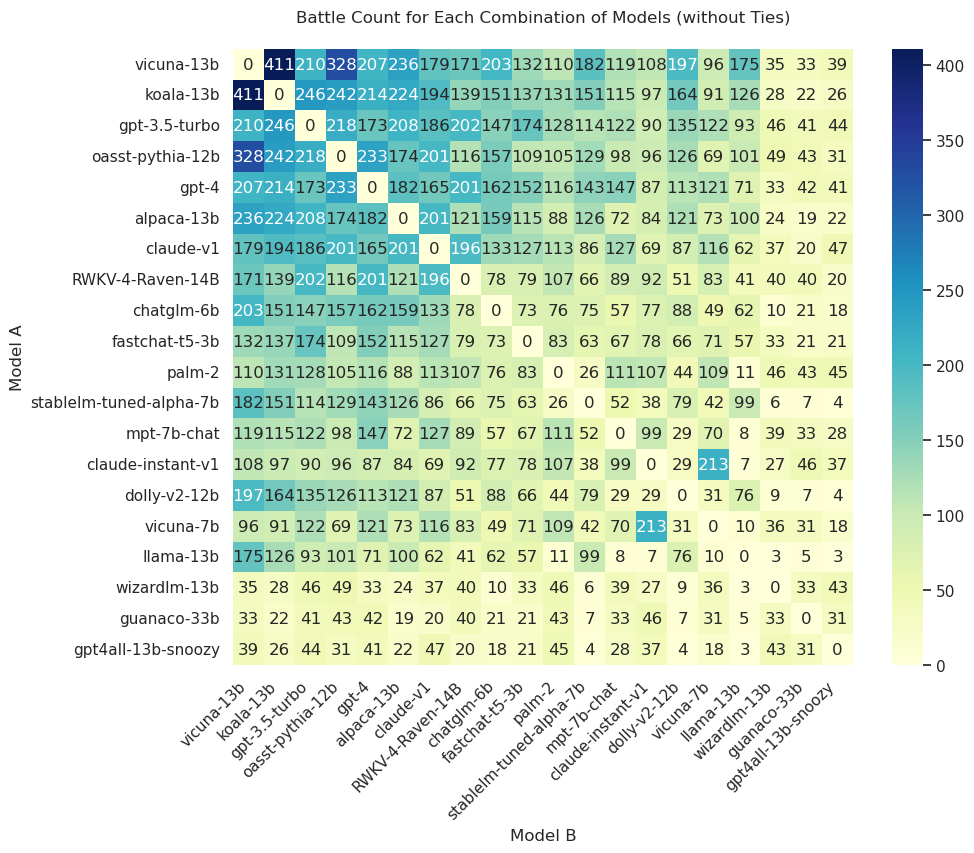

In [36]:
visualize_battle_count(battles_no_ties, "Battle Count for Each Combination of Models (without Ties)")

## **Topic Modeling**

In [37]:
#finding most popular topics for prompts
df['topic_modeling_1'].value_counts().head(10)

topic_modeling_1
Creative Writing                     569
Factual Accuracy                     510
Problem-solving, Creativity          398
Factual Knowledge                    300
Problem Solving                      283
Math Problem                         209
Information Retrieval                189
Problem-solving, Factual accuracy    176
Creativity, Humor                    164
Problem-Solving, Creativity          144
Name: count, dtype: int64

In [38]:
#cleaning prompt data
topics_1 = df['topic_modeling_1'].dropna().astype(str).str.split(', ').apply(lambda x: [item.lower().replace("-", " ") for item in x])
topics_2 = df['topic_modeling_2'].dropna().astype(str).str.split(', ').apply(lambda x: [item.lower().replace("-", " ") for item in x])
topics_3 = df['topic_modeling_3'].dropna().astype(str).str.split(', ').apply(lambda x: [item.lower().replace("-", " ") for item in x])

In [39]:
all_topics = pd.concat([pd.Series(topics) for topics in [topics_1, topics_2,topics_3]]).explode()


In [40]:
#finding top20 topics
top_20_topics = all_topics.value_counts().reset_index().head(20)
top_20_topics.columns = ['Topic', 'Frequency']

#### **Fig 13: Most Popular Topics in Prompts**


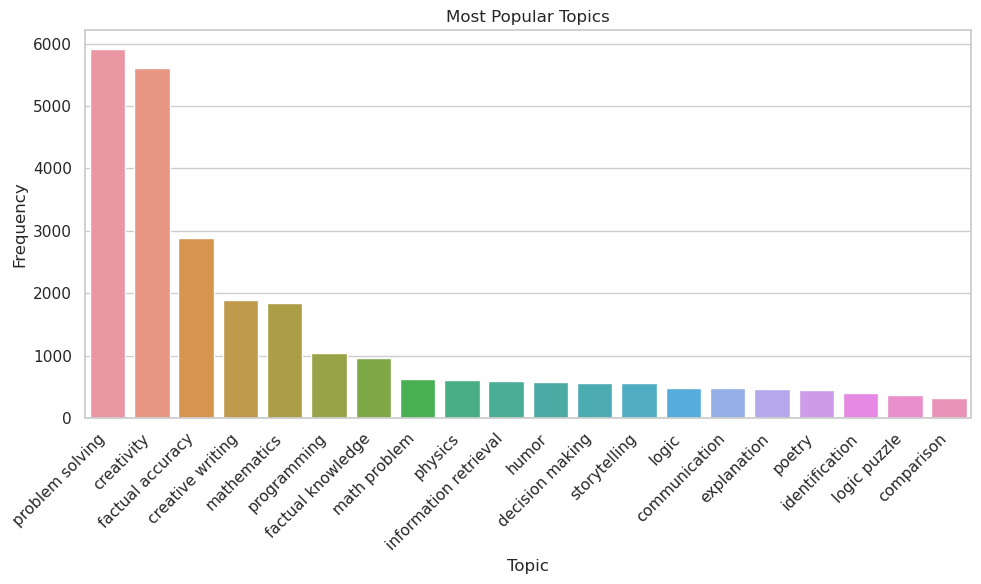

In [41]:
#plotting most popular topics
plt.figure(figsize=(10, 6))
sns.barplot(data=top_20_topics, x='Topic', y='Frequency')

plt.title('Most Popular Topics')
plt.xlabel('Topic')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## **Judges & Model Win Rate**

In [42]:
#judge counts
df.judge.value_counts()

judge
arena_user_9965     307
arena_user_257      288
arena_user_13046    192
arena_user_3820     181
arena_user_15085    178
                   ... 
arena_user_9899       1
arena_user_1252       1
arena_user_10345      1
arena_user_9721       1
arena_user_21247      1
Name: count, Length: 10539, dtype: int64

In [43]:
#winrate of models
win_rate.sort_values(ascending = False)

model
gpt-4                      0.676095
claude-v1                  0.606818
claude-instant-v1          0.557377
gpt-3.5-turbo              0.533241
vicuna-13b                 0.438651
guanaco-33b                0.425560
palm-2                     0.416264
wizardlm-13b               0.367612
koala-13b                  0.350423
vicuna-7b                  0.303862
alpaca-13b                 0.244789
oasst-pythia-12b           0.241088
mpt-7b-chat                0.238642
gpt4all-13b-snoozy         0.235762
RWKV-4-Raven-14B           0.233997
chatglm-6b                 0.197990
fastchat-t5-3b             0.197337
stablelm-tuned-alpha-7b    0.178802
dolly-v2-12b               0.156816
llama-13b                  0.144678
Name: win rate, dtype: float64

In [44]:
#grouping by judge and winner
grouped_df = df.groupby(['judge', 'winner']).size().reset_index(name='counts')
winners_df = grouped_df.loc[grouped_df.groupby('judge')['counts'].idxmax()]

In [45]:
df.head()

,question_id,model_a,model_b,winner,judge,conversation_a,conversation_b,prompt_x,prompt_length,prompt_y,...,score_value_2,topic_modeling_3,score_reason_3,score_value_3,prompt,response_a,response_a_length,response_b,response_b_length,score_avg
0,58210e39b3fd4441a2bd4a518bb44c2d,chatglm-6b,koala-13b,model_b,arena_user_973,[{'content': 'What is the difference between O...,[{'content': 'What is the difference between O...,What is the difference between OpenCL and CUDA?,47,What is the difference between OpenCL and CUDA?,...,8.0,"Comparison, Technology",This prompt requires the AI to demonstrate kno...,9.0,What is the difference between OpenCL and CUDA?,OpenCL and CUDA are two different programming ...,892,OpenCL and CUDA are both programming languages...,1905,8.666667
1,2564acd09e3942fd97657d05282d4389,oasst-pythia-12b,alpaca-13b,tie,arena_user_973,[{'content': 'Why did my parent not invite me ...,[{'content': 'Why did my parent not invite me ...,Why did my parent not invite me to their wedding?,49,Why did my parent not invite me to their wedding?,...,8.0,"Reasoning, Emotional",This prompt challenges the AI to infer motives...,8.0,Why did my parent not invite me to their wedding?,It is possible that your parent did not invite...,660,It is likely that they wanted to keep the gues...,514,8.333333
2,90bfd142157948aba01931726c888e7f,koala-13b,oasst-pythia-12b,model_b,arena_user_973,"[{'content': 'Fuji vs. Nikon, which is better?...","[{'content': 'Fuji vs. Nikon, which is better?...","Fuji vs. Nikon, which is better?",32,"Fuji vs. Nikon, which is better?",...,6.0,Photography comparison,This prompt is subjective and does not provide...,2.0,"Fuji vs. Nikon, which is better?",Both Fuji and Nikon are popular camera brands ...,1114,This is a subjective question and the answer d...,1566,3.333333
3,a7c5accc53e649a3bc6b2e41d962ebc4,vicuna-13b,oasst-pythia-12b,model_b,arena_user_973,[{'content': 'How to build an arena for chatbo...,[{'content': 'How to build an arena for chatbo...,How to build an arena for chatbots?,35,How to build an arena for chatbots?,...,8.0,Chatbot Arena,This prompt requires problem-solving skills an...,8.0,How to build an arena for chatbots?,Building an arena for chatbots can be done by ...,1575,Building an arena for chatbots is a great way ...,1624,8.000000
4,adf27e819a3c494cb6e993f0c660e097,vicuna-13b,koala-13b,model_a,arena_user_973,"[{'content': 'When is it today?', 'role': 'use...","[{'content': 'When is it today?', 'role': 'use...",When is it today?,17,When is it today?,...,2.0,Time-based Inquiry,This prompt is too straightforward and simply ...,2.0,When is it today?,"I'm sorry, I cannot determine the current date...",267,"Today is February 23, 2023.",27,2.000000


In [46]:
#getting winning model
df['winning_model'] = df.apply(lambda x: x['model_a'] if x['winner'] == 'model_a' else x['model_b'], axis=1)

In [47]:
#finidng win percent per judge, looking to see biases
result = df.groupby(['judge', 'winning_model']).size().reset_index(name='wins')

total_wins_by_judge = result.groupby('judge')['wins'].sum().reset_index(name='total_wins')

result = pd.merge(result, total_wins_by_judge, on='judge')

result['win_percentage'] = result['wins'] / result['total_wins']

In [48]:
result

,judge,winning_model,wins,total_wins,win_percentage
0,arena_user_1000,alpaca-13b,2,9,0.222222
1,arena_user_1000,dolly-v2-12b,1,9,0.111111
2,arena_user_1000,koala-13b,1,9,0.111111
3,arena_user_1000,vicuna-13b,5,9,0.555556
4,arena_user_10002,RWKV-4-Raven-14B,1,2,0.500000
...,...,...,...,...,...
18659,arena_user_9995,gpt-3.5-turbo,1,4,0.250000
18660,arena_user_9995,gpt-4,1,4,0.250000
18661,arena_user_9995,mpt-7b-chat,1,4,0.250000
18662,arena_user_9997,gpt-3.5-turbo,1,1,1.000000


In [49]:
#sorting for highest win percent by judge
result_sorted = result.sort_values(by=['judge', 'win_percentage'], ascending=[True, False])

highest_win_percentage_per_judge = result_sorted.drop_duplicates(subset='judge', keep='first')


In [50]:
highest_win_percentage_per_judge

,judge,winning_model,wins,total_wins,win_percentage
3,arena_user_1000,vicuna-13b,5,9,0.555556
4,arena_user_10002,RWKV-4-Raven-14B,1,2,0.500000
10,arena_user_10006,vicuna-13b,2,6,0.333333
11,arena_user_10007,gpt-3.5-turbo,1,2,0.500000
13,arena_user_10015,koala-13b,1,1,1.000000
...,...,...,...,...,...
18648,arena_user_9992,claude-v1,1,3,0.333333
18653,arena_user_9993,fastchat-t5-3b,2,9,0.222222
18658,arena_user_9995,RWKV-4-Raven-14B,1,4,0.250000
18662,arena_user_9997,gpt-3.5-turbo,1,1,1.000000


In [51]:
model_preference = highest_win_percentage_per_judge.groupby('winning_model')['wins'].sum().reset_index(name='total_wins').sort_values(by='total_wins', ascending=False)
model_preference

,winning_model,total_wins
4,claude-v1,1389
8,gpt-4,1367
17,vicuna-13b,1305
7,gpt-3.5-turbo,1299
11,koala-13b,1038
3,claude-instant-v1,975
1,alpaca-13b,794
0,RWKV-4-Raven-14B,655
14,oasst-pythia-12b,621
2,chatglm-6b,533


# Task B: Predicting Hardness Score

In [52]:
%pip install textblob
%pip install textstat

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json, math
from tqdm import tqdm
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.linear_model import Lasso


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from textblob import TextBlob
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Lasso

import textstat



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [53]:
embeddings = np.load(
    "data/chatbot-arena-prompts-embeddings.npy"
)

df = pd.read_json(
    "data/chatbot-arena-conversations.jsonl.gz",
    lines=True,
)
scores_df = pd.read_json(
    "data/nlp-arena-data/chatbot-arena-gpt3-scores.jsonl.gz",
    lines=True,
)
df = df.merge(scores_df, on='question_id')

### Adding in embeddings into the dataset

In [54]:
# trim to match the length of embeddings
if len(df) > len(embeddings):
    df_trimmed = df.iloc[:len(embeddings)].reset_index(drop=True)
else:
    df_trimmed = df.reset_index(drop=True)

# Converting embeddings to a df
embeddings_df = pd.DataFrame(embeddings)

# Renaming columns
embeddings_df.columns = [f'emb_dim_{i}' for i in range(embeddings_df.shape[1])]

# Adding in embeddings
df_with_embeddings = pd.concat([df_trimmed, embeddings_df], axis=1)



In [55]:
# Normalizing score values and computing average score
df['score_value_1'] = df['score_value_1'].apply(lambda x: x[0][0] if isinstance(x, list) else x)
df['score_value_2'] = df['score_value_2'].apply(lambda x: x[0][0] if isinstance(x, list) else x)
df['score_value_3'] = df['score_value_3'].apply(lambda x: x[0][0] if isinstance(x, list) else x)
df['score_avg'] = (df['score_value_1'] + df['score_value_2'] + df['score_value_3'] ) / 3
df_with_embeddings['score_avg'] = df['score_avg']

### Dropping NAs

In [56]:
# Ensure the column used for grouping is converted to a string if it contains unhashable types (e.g., lists)
df_with_embeddings[''] = df_with_embeddings['topic_modeling_1'].dropna().astype(str).str.split(', ').apply(lambda x: [item.lower().replace("-", " ") for item in x])

df_with_embeddings['topic_modeling_1'] = df_with_embeddings['topic_modeling_1'].apply(lambda x: str(x))

### Calculating average embedding

In [57]:
average_embedding = np.mean(embeddings, axis=1)
df_with_embeddings['embed_avg']= average_embedding


### Calculating word count & adding into dataframe

In [58]:
# Word count
df_with_embeddings['word_count'] = df['prompt_x'].apply(lambda x: len(x.split()))


### Calculating sentiment and subjectivity

In [59]:
# Sentiment polarity and subjectivity
df_with_embeddings['sentiment'] = df['prompt_x'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_with_embeddings['subjectivity'] = df['prompt_x'].apply(lambda x: TextBlob(x).sentiment.subjectivity)


### Removing outliers by length in prompts

In [60]:
# Calculating 25th percentile & 75th percentile of prompt length
Q1 = df_with_embeddings['prompt_length'].quantile(0.25)
Q3 = df_with_embeddings['prompt_length'].quantile(0.75)

# IQR
IQR = Q3 - Q1

# Outlier calc
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering out outliers
df_filtered = df_with_embeddings[(df_with_embeddings['prompt_length'] >= lower_bound) & (df_with_embeddings['prompt_length'] <= upper_bound)]

### Calculating a complexity score for the prompts

In [61]:
# Calculating Flesch Reading Ease score
df_with_embeddings['flesch_reading_ease'] = df['prompt_x'].apply(textstat.flesch_reading_ease)

### Clustering the embeddings

In [62]:
# Number of clusters
n_clusters = 35

# Initialize K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit K-Means
kmeans.fit(embeddings)

# Getting labels
cluster_labels = kmeans.labels_

# Adding cluster lables into df
df_with_embeddings['cluster'] = cluster_labels

/srv/conda/envs/notebook/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Adding in topic modeling and reducing raw # of topics

In [63]:
# Calculating value counts
topic_counts = df_with_embeddings['topic_modeling_1'].value_counts()

# Identifing topics that have at least 2 counts
topics_more_than_once = topic_counts[topic_counts >= 2].index

# Filtering for topics that occur atleast twice
df_with_embeddings_final = df_with_embeddings[df_with_embeddings['topic_modeling_1'].isin(topics_more_than_once)]
df_with_embeddings_final


,question_id,model_a,model_b,winner,judge,conversation_a,conversation_b,prompt_x,prompt_length,prompt_y,...,emb_dim_254,emb_dim_255,score_avg,,embed_avg,word_count,sentiment,subjectivity,flesch_reading_ease,cluster
0,58210e39b3fd4441a2bd4a518bb44c2d,chatglm-6b,koala-13b,model_b,arena_user_973,[{'content': 'What is the difference between O...,[{'content': 'What is the difference between O...,What is the difference between OpenCL and CUDA?,47,What is the difference between OpenCL and CUDA?,...,-0.037567,-0.043998,8.666667,[technical comparison],-0.005240,8,0.0000,0.000000,63.36,0
4,adf27e819a3c494cb6e993f0c660e097,vicuna-13b,koala-13b,model_a,arena_user_973,"[{'content': 'When is it today?', 'role': 'use...","[{'content': 'When is it today?', 'role': 'use...",When is it today?,17,When is it today?,...,0.012092,-0.010177,2.000000,[time query],0.002491,4,0.0000,0.000000,92.80,7
6,c4938f25c1d94fc1b110ace95a2243d0,vicuna-13b,koala-13b,model_a,arena_user_973,"[{'content': 'Emoji for ""sharing"". List 10', '...","[{'content': 'Emoji for ""sharing"". List 10', '...","Emoji for ""sharing"". List 10",28,"Emoji for ""sharing"". List 10",...,0.080810,-0.069312,7.333333,[emoji selection],-0.007627,5,0.0000,0.000000,83.32,32
8,cbbb83487f534ec5b4cc92b93b79fa2c,stablelm-tuned-alpha-7b,oasst-pythia-12b,model_a,arena_user_973,"[{'content': 'A = 5, B =10, A+B=?', 'role': 'u...","[{'content': 'A = 5, B =10, A+B=?', 'role': 'u...","A = 5, B =10, A+B=?",19,"A = 5, B =10, A+B=?",...,0.007358,0.010474,2.000000,[arithmetic calculation],-0.004290,6,0.0000,0.000000,117.16,27
9,ce4b1e7676444384994dbda7b228018c,koala-13b,vicuna-13b,tie,arena_user_973,"[{'content': 'A = 5, B =10, A+B=?', 'role': 'u...","[{'content': 'A = 5, B =10, A+B=?', 'role': 'u...","A = 5, B =10, A+B=?",19,"A = 5, B =10, A+B=?",...,0.007358,0.010474,2.000000,[mathematical operations],-0.004290,6,0.0000,0.000000,117.16,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25304,dc1919fd62e448c3840cd9f57f7be407,guanaco-33b,gpt4all-13b-snoozy,model_a,arena_user_21242,[{'content': 'Tell me a little about yourself....,[{'content': 'Tell me a little about yourself....,Tell me a little about yourself.,32,Tell me a little about yourself.,...,-0.125293,0.083987,2.000000,[self introduction],0.000554,6,-0.1875,0.500000,90.77,11
25310,7b9320694e3a4c3aa696d6368227803b,RWKV-4-Raven-14B,wizardlm-13b,model_b,arena_user_21274,[{'content': 'Where clone technology in primat...,[{'content': 'Where clone technology in primat...,Where clone technology in primates stands toda...,136,Where clone technology in primates stands toda...,...,0.023486,-0.017514,7.666667,[primate cloning],-0.003864,22,0.5000,0.500000,68.77,16
25311,79b0cb1a24d24ec58179cbe8ec41ddab,gpt-4,gpt4all-13b-snoozy,model_a,arena_user_21274,[{'content': 'Where clone technology in primat...,[{'content': 'Where clone technology in primat...,Where clone technology in primates stands toda...,136,Where clone technology in primates stands toda...,...,-0.066603,0.043442,7.666667,[primate cloning],-0.010723,22,0.5000,0.500000,68.77,17
25312,4c198728475040b8bf84dc4b74f98b7b,koala-13b,wizardlm-13b,tie,arena_user_10252,[{'content': 'Assume you are a Taxi driver and...,[{'content': 'Assume you are a Taxi driver and...,Assume you are a Taxi driver and please answer...,496,Assume you are a Taxi driver and please answer...,...,-0.102230,-0.032399,8.000000,"[problem solving, factual accuracy]",0.004522,80,-0.5375,0.845833,53.41,16


### Filtering columns for training

In [64]:
# gettting columns
df_ready_for_training = df_with_embeddings_final[[
    'topic_modeling_1', 'score_avg', 'prompt_length', 'word_count', 
    'sentiment', 'subjectivity', 'flesch_reading_ease', 'cluster'
]]

### Standardizing numeric columns

In [65]:
# Standardizing numeric features
numeric_features = ['prompt_length', 'word_count', 'sentiment', 'subjectivity','flesch_reading_ease']
scaler = StandardScaler()
df_ready_for_training[numeric_features] = scaler.fit_transform(df_ready_for_training[numeric_features])

/tmp/ipykernel_299/1910357317.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ready_for_training[numeric_features] = scaler.fit_transform(df_ready_for_training[numeric_features])


### Getting Dummies for embedding clusters & topic modeling

In [66]:
df_ready_for_training = pd.get_dummies(df_ready_for_training, columns=['cluster'])

df_ready_for_training = pd.get_dummies(df_ready_for_training, columns=['topic_modeling_1'], prefix='', prefix_sep='')

### Training linear regression

In [67]:
# Removing rows with missing values
df_ready_for_training = df_ready_for_training.dropna(subset=['score_avg'])

X = df_ready_for_training.drop(['score_avg'], axis=1)
y = df_ready_for_training['score_avg']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Linear Regression model
model = LinearRegression()

# Train model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluation using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2.3721669866681496e+21


In [68]:
# Print all column names as a list
print(list(df_ready_for_training.columns))

['score_avg', 'prompt_length', 'word_count', 'sentiment', 'subjectivity', 'flesch_reading_ease', 'cluster_0', 'cluster_1', 'cluster_2', 'cluster_3', 'cluster_4', 'cluster_5', 'cluster_6', 'cluster_7', 'cluster_8', 'cluster_9', 'cluster_10', 'cluster_11', 'cluster_12', 'cluster_13', 'cluster_14', 'cluster_15', 'cluster_16', 'cluster_17', 'cluster_18', 'cluster_19', 'cluster_20', 'cluster_21', 'cluster_22', 'cluster_23', 'cluster_24', 'cluster_25', 'cluster_26', 'cluster_27', 'cluster_28', 'cluster_29', 'cluster_30', 'cluster_31', 'cluster_32', 'cluster_33', 'cluster_34', '3D Modeling', '3D modeling', 'AGI Impact', 'AI Architecture', 'AI Chatbot', 'AI Classification', 'AI Development', 'AI Education', 'AI Ethics', 'AI Evaluation', 'AI Fine-tuning', 'AI Implementation', 'AI Integration', 'AI Parameters', 'AI Proficiency', 'AI Proficiency Assessment', 'AI Programming', 'AI Risk', 'AI Sentience', 'AI Terminology', 'AI Training', 'AI evaluation', 'AI proficiency', 'API Development', 'API Int